# **Sentiment analysis on tweets**

## **OBJECTIVE**


Sentiment analysis on tweets involves determining the sentiment expressed in a given tweet, i.e., whether the tweet conveys a positive, negative, sentiment.

You will be doing sentiment analysis on tweets into positive and negative tweets .we will be using the [Natural Language Toolkit (NLTK)](http://www.nltk.org/howto/twitter.html) package, an open-source Python library for natural language processing. It has modules for collecting, handling, and processing Twitter data, and you will be acquainted with them as we move along the course.

Let us import them now as well as a few other libraries we will be using.

In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
import numpy as np

## About the Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.



In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

We load the text fields of the positive and negative tweets by using the module's strings() method like this:

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
import pandas as pd
all_positive_tweets = pd.DataFrame(data = all_positive_tweets)
all_positive_tweets.head(50)

,0
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...
5,@BhaktisBanter @PallaviRuhail This one is irre...
6,We don't like to keep our lovely customers wai...
7,"@Impatientraider On second thought, there’s ju..."
8,"Jgh , but we have to go to Bayan :D bye"
9,"As an act of mischievousness, am calling the E..."


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [5]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'pandas.core.frame.DataFrame'>
The type of a tweet entry is:  <class 'str'>


We can see that the data is stored in a list and as you might expect, individual tweets are stored as strings.

You can make a more visually appealing report by using Matplotlib's [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) library. Let us see how to create a [pie chart](https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) to show the same information as above. This simple snippet will serve you in future visualizations of this kind of data.

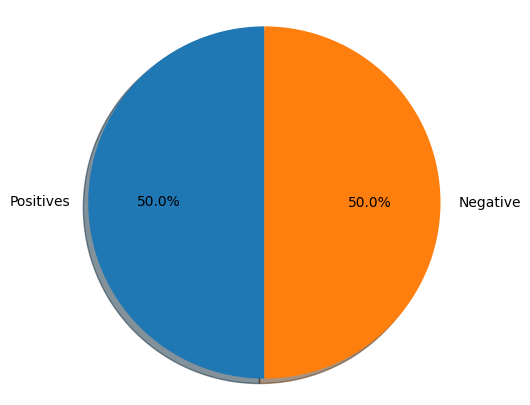

In [6]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

## Looking at raw texts

Before anything else, we can print a couple of tweets from the dataset to see how they look. Understanding the data is responsible for 80% of the success or failure in data science projects. We can use this time to observe aspects we'd like to consider when preprocessing our data.

Below, you will print one random positive and one random negative tweet. We have added a color mark at the beginning of the string to further distinguish the two. (Warning: This is taken from a public dataset of real tweets and a very small portion has explicit content.)

In [7]:
# print positive in greeen
#print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

I already miss her. That old _  _ _ :(


One observation you may have is the presence of [emoticons](https://en.wikipedia.org/wiki/Emoticon) and URLs in many of the tweets. This info will come in handy in the next steps.

## Preprocess raw text for Sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming


In [8]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets.iloc[2277][0]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Let's import a few more libraries for this purpose.

In [9]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Remove hyperlinks,  Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [10]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily:

In [11]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [12]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We can see that the stop words list above contains some words that could be important in some contexts.
These could be words like _i, not, between, because, won, against_. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...'  should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Time to clean up our tokenized tweet!

In [13]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


Please note that the words **happy** and **sunny** in this list are correctly spelled.

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t

All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er

We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.

NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [14]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


## process_tweet()

As shown above, preprocessing consists of multiple steps before you arrive at the final list of words. We will not ask you to replicate these however. In the week's assignment, you will use the function `process_tweet(tweet)` available in _utils.py_. We encourage you to open the file and you'll see that this function's implementation is very similar to the steps above.

To obtain the same result as in the previous code cells, you will only need to call the function `process_tweet()`. Let's do that in the next cell.

#### Import some helper functions that we provided in the utils.py file:
* `process_tweet()`: Cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
* `build_freqs()`: This counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label `1` or a negative label `0`. It then builds the `freqs` dictionary, where each key is a `(word,label)` tuple, and the value is the count of its frequency within the corpus of tweets.

In [15]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs


In [16]:
# choose the same tweet
tweet = all_positive_tweets.iloc[2277][0]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


# Building and Visualizing word frequencies

We will focus on the `build_freqs()` helper function and visualizing a dataset fed into it. In our goal of tweet sentiment analysis, this function will build a dictionary where we can lookup how many times a word appears in the lists of positive or negative tweets. This will be very helpful when extracting the features. Let's see how this function is implemented under the hood in this notebook.

In [17]:
# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


In [18]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

## Dictionaries

In Python, a dictionary is a mutable and indexed collection. It stores items as key-value pairs and uses [hash tables](https://en.wikipedia.org/wiki/Hash_table) underneath to allow practically constant time lookups. In NLP, dictionaries are essential because it enables fast retrieval of items or containment checks even with thousands of entries in the collection.

### Definition

A dictionary in Python is declared using curly brackets. Look at the next example:

In [19]:
dictionary = {'key1': 1, 'key2': 2}

In [20]:
# Add a new entry
dictionary['key3'] = -5

# Overwrite the value of key1
dictionary['key1'] = 0

print(dictionary)

{'key1': 0, 'key2': 2, 'key3': -5}


### Accessing values and lookup keys

Performing dictionary lookups and retrieval are common tasks in NLP. There are two ways to do this:

* Using square bracket notation: This form is allowed if the lookup key is in the dictionary. It produces an error otherwise.
* Using the [get()](https://docs.python.org/3/library/stdtypes.html#dict.get) method: This allows us to set a default value if the dictionary key does not exist.

Let us see these in action:

When using a square bracket lookup, it is common to use an if-else block to check for containment first (with the keyword `in`) before getting the item. On the other hand, you can use the `.get()` method if you want to set a default value when the key is not found. Let's compare these in the cells below:

In [21]:
# This prints a value
if 'key1' in dictionary:
    print("item found: ", dictionary['key1'])
else:
    print('key1 is not defined')

# Same as what you get with get
print("item found: ", dictionary.get('key1', -1))

item found:  0
item found:  0


In [22]:
# This prints a message because the key is not found
if 'key7' in dictionary:
    print(dictionary['key7'])
else:
    print('key does not exist!')

# This prints -1 because the key is not found and we set the default to -1
print(dictionary.get('key7', -1))

key does not exist!
-1


## Word frequency dictionary

In [23]:
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [24]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13171


## Word frequency dictionary

In [25]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13171


In [26]:
freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3691,
 ('hey', 1.0): 77,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 99,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 643,
 ('listen', 1.0): 17,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 131,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 401,


## Table of word counts

In [27]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:

    # initialize positive and negative counts
    pos = 0
    neg = 0

    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    # append the word counts to the table
    data.append([word, pos, neg])

data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


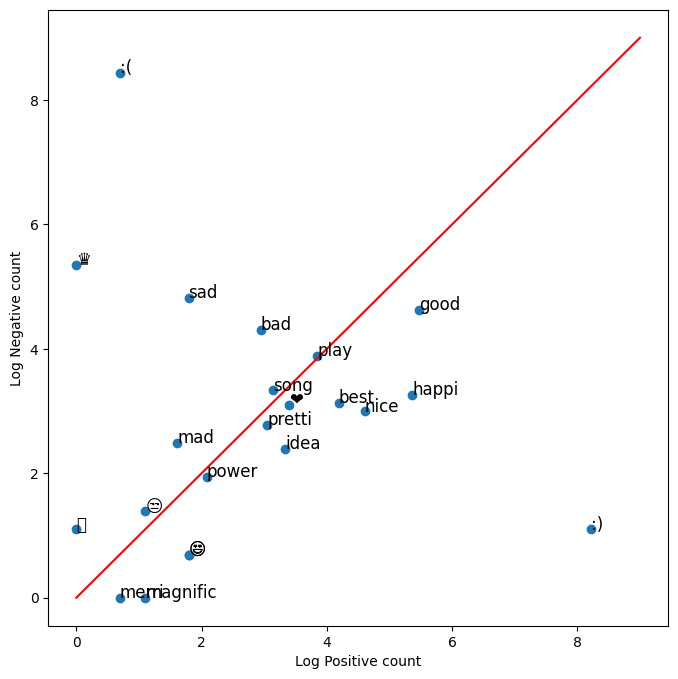

In [28]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])

# Plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

This chart is straightforward to interpret. It shows that emoticons `:)` and `:(` are very important for sentiment analysis. Thus, we should not let preprocessing steps get rid of these symbols!

Furthermore, what is the meaning of the crown symbol? It seems to be very negative!

#Logistic Regression classification

logistic regression. Concretely, you will be implementing logistic regression

In [29]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
# Train test split: 20% will be in the test set, and 80% in the training set.
# split the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

In [30]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [28]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

* Create the frequency dictionary using the imported build_freqs function.  
    * We highly recommend that you open utils.py and read the build_freqs function to understand what it is doing.
    * To view the file directory, go to the menu and click File->Open.

```Python
    for y,tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
```
* Notice how the outer for loop goes through each tweet, and the inner for loop steps through each word in a tweet.
* The 'freqs' dictionary is the frequency dictionary that's being built.
* The key is the tuple (word, label), such as ("happy",1) or ("happy",0).  The value stored for each key is the count of how many times the word "happy" was associated with a positive label, or how many times "happy" was associated with a negative label.

In [31]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11427


### Process Tweet
The given function 'process_tweet' tokenizes the tweet into individual words, removes stop words and applies stemming.

In [33]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


<a name='1'></a>
## 1 - Logistic Regression

<a name='1-1'></a>
### 1.1 - Sigmoid
You will learn to use logistic regression for text classification.
* The sigmoid function is defined as:

$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

It maps the input 'z' to a value that ranges between 0 and 1, and so it can be treated as a probability.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='./images/sigmoid_plot.jpg' alt="alternate text" width="width" height="height" style="width:300px;height:200px;" /> Figure 1 </div>

In [34]:
# define sigmoid function
def sigmoid(z):
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''

    ### START CODE HERE ###
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###

    return h

Let me break down the structure of the code:

**test_sigmoid function**: Tests the sigmoid function with different input values and checks if the output matches the expected values.

**test_gradientDescent function**: Tests the gradient descent function for logistic regression with different input values and checks if the output loss and weights match the expected values.

**test_extract_features function**: Tests the feature extraction function with different input tweets and checks if the output feature vectors match the expected values.

**test_predict_tweet function**: Tests the tweet prediction function with different input tweets, frequency dictionaries, and theta values, and checks if the output predictions match the expected values.

**unittest_test_logistic_regression function**: Tests the overall logistic regression model with different sets of tweets, frequency dictionaries, and theta values, and checks if the accuracy matches the expected values.

Each test case includes a set of input parameters, an expected output, and assertions to compare the actual output with the expected output. If the assertions fail, error messages are printed to help identify the issue.

In [35]:
# Testing your function
if (sigmoid(0) == 0.5):
    print('SUCCESS!')
else:
    print('Oops!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

SUCCESS!
CORRECT!


In [45]:
# FROM w1_unittest.py

def test_sigmoid(target):
    successful_cases = 0
    failed_cases = []

    test_cases = [
        {"name": "default_check", "input": {"z": 0}, "expected": 0.5},
        {
            "name": "positive_check",
            "input": {"z": 4.92},
            "expected": 0.9927537604041685,
        },
        {"name": "negative_check", "input": {"z": -1}, "expected": 0.2689414213699951},
        {
            "name": "larger_neg_check",
            "input": {"z": -20},
            "expected": 2.0611536181902037e-09,
        },
    ]

    for test_case in test_cases:
        result = target(**test_case["input"])

        try:
            assert np.isclose(result, test_case["expected"])
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"],
                    "got": result,
                }
            )
            print(
                f"Wrong output from sigmoid function. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

    if len(failed_cases) == 0:
        print("\033[92m All tests passed")
    else:
        print("\033[92m", successful_cases, " Tests passed")
        print("\033[91m", len(failed_cases), " Tests failed")

    # return failed_cases, len(failed_cases) + successful_cases


def test_gradientDescent(target):
    successful_cases = 0
    failed_cases = []

    test_cases = [
        {
            "name": "default_check",
            "input": {
                "random_seed": 1,
                "input_dict": {
                    "x": np.array(
                        [
                            [1.00000000e00, 8.34044009e02, 1.44064899e03],
                            [1.00000000e00, 2.28749635e-01, 6.04665145e02],
                            [1.00000000e00, 2.93511782e02, 1.84677190e02],
                            [1.00000000e00, 3.72520423e02, 6.91121454e02],
                            [1.00000000e00, 7.93534948e02, 1.07763347e03],
                            [1.00000000e00, 8.38389029e02, 1.37043900e03],
                            [1.00000000e00, 4.08904499e02, 1.75623487e03],
                            [1.00000000e00, 5.47751864e01, 1.34093502e03],
                            [1.00000000e00, 8.34609605e02, 1.11737966e03],
                            [1.00000000e00, 2.80773877e02, 3.96202978e02],
                        ]
                    ),
                    "y": np.array(
                        [
                            [1.0],
                            [1.0],
                            [0.0],
                            [1.0],
                            [1.0],
                            [1.0],
                            [0.0],
                            [0.0],
                            [0.0],
                            [1.0],
                        ]
                    ),
                    "theta": np.zeros((3, 1)),
                    "alpha": 1e-8,
                    "num_iters": 700,
                },
            },
            "expected": {
                "J": 0.6709497038162118,
                "theta": np.array(
                    [[4.10713435e-07], [3.56584699e-04], [7.30888526e-05]]
                ),
            },
        },
        {
            "name": "larger_check",
            "input": {
                "random_seed": 2,
                "input_dict": {
                    "x": np.array(
                        [
                            [1.0, 435.99490214, 25.92623183, 549.66247788],
                            [1.0, 435.32239262, 420.36780209, 330.334821],
                            [1.0, 204.64863404, 619.27096635, 299.65467367],
                            [1.0, 266.8272751, 621.13383277, 529.14209428],
                            [1.0, 134.57994534, 513.57812127, 184.43986565],
                            [1.0, 785.33514782, 853.97529264, 494.23683738],
                            [1.0, 846.56148536, 79.64547701, 505.24609012],
                            [1.0, 65.28650439, 428.1223276, 96.53091566],
                            [1.0, 127.1599717, 596.74530898, 226.0120006],
                            [1.0, 106.94568431, 220.30620707, 349.826285],
                            [1.0, 467.78748458, 201.74322626, 640.40672521],
                            [1.0, 483.06983555, 505.23672002, 386.89265112],
                            [1.0, 793.63745444, 580.00417888, 162.2985985],
                            [1.0, 700.75234661, 964.55108009, 500.00836117],
                            [1.0, 889.52006395, 341.61365267, 567.14412763],
                            [1.0, 427.5459633, 436.74726303, 776.559185],
                            [1.0, 535.6041735, 953.74222694, 544.20816015],
                            [1.0, 82.09492228, 366.34240168, 850.850504],
                            [1.0, 406.27504305, 27.20236589, 247.177239],
                            [1.0, 67.14437074, 993.85201142, 970.58031338],
                        ]
                    ),
                    "y": np.array(
                        [
                            [1.0],
                            [1.0],
                            [1.0],
                            [0.0],
                            [0.0],
                            [1.0],
                            [0.0],
                            [0.0],
                            [1.0],
                            [0.0],
                            [1.0],
                            [0.0],
                            [0.0],
                            [0.0],
                            [1.0],
                            [1.0],
                            [0.0],
                            [0.0],
                            [1.0],
                            [0.0],
                        ]
                    ),
                    "theta": np.zeros((4, 1)),
                    "alpha": 1e-4,
                    "num_iters": 30,
                },
            },
            "expected": {
                "J": 6.5044107216556135,
                "theta": np.array(
                    [
                        [9.45211976e-05],
                        [2.40577958e-02],
                        [-1.77876847e-02],
                        [1.35674845e-02],
                    ]
                ),
            },
        },
    ]

    for test_case in test_cases:
        # Setting the random seed for reproducibility
        result_J, result_theta = target(**test_case["input"]["input_dict"])

        try:
            assert isinstance(result_J, float)
            successful_cases += 1
        except:
            failed_cases.append(
                {"name": test_case["name"], "expected": float, "got": type(result_J),}
            )
            print(
                f"Wrong output type for loss function. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

        try:
            assert np.isclose(result_J, test_case["expected"]["J"])
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"]["J"],
                    "got": result_J,
                }
            )
            print(
                f"Wrong output for the loss function. Check how you are implementing the matrix multiplications. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

        try:
            assert result_theta.shape == test_case["input"]["input_dict"]["theta"].shape
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["input"]["input_dict"]["theta"].shape,
                    "got": result_theta.shape,
                }
            )
            print(
                f"Wrong shape for weights matrix theta. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

        try:
            assert np.allclose(
                np.squeeze(result_theta), np.squeeze(test_case["expected"]["theta"]),
            )
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"]["theta"],
                    "got": result_theta,
                }
            )
            print(
                f"Wrong values for weight's matrix theta. Check how you are updating the matrix of weights. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

    if len(failed_cases) == 0:
        print("\033[92m All tests passed")
    else:
        print("\033[92m", successful_cases, " Tests passed")
        print("\033[91m", len(failed_cases), " Tests failed")



# +
def test_extract_features(target, freqs):
    successful_cases = 0
    failed_cases = []

    test_cases = [
        {
            "name": "default_check",
            "input": {
                "tweet": "#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)",
                "freqs": freqs,
            },
            "expected": np.array(
                [[1.00e00, 3.133e03, 6.10e01]]
            ),
        },
        {
            "name": "unk_words_check",
            "input": {"tweet": "blorb bleeeeb bloooob", "freqs": freqs},
            "expected": np.array([[1.0, 0.0, 0.0]]),
        },
        {
            "name": "good_words_check",
            "input": {"tweet": "Hello world! All's good!", "freqs": freqs},
            "expected": np.array([[1.0, 263.0, 106.0]]),
        },
        {
            "name": "bad_words_check",
            "input": {"tweet": "It is so sad!", "freqs": freqs},
            "expected": np.array([[1.0, 5.0, 100.0]]),
        },
    ]

    for test_case in test_cases:
        result = target(**test_case["input"])

        try:
            assert result.shape == test_case["expected"].shape
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"].shape,
                    "got": result.shape,
                }
            )
            print(
                f"Wrong output shape. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

        try:
            assert np.allclose(result, test_case["expected"])
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"],
                    "got": result,
                }
            )
            print(
                f"Wrong output values. Check how you are computing the positive or negative word count. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

    if len(failed_cases) == 0:
        print("\033[92m All tests passed")
    else:
        print("\033[92m", successful_cases, " Tests passed")
        print("\033[91m", len(failed_cases), " Tests failed")


# -

def test_predict_tweet(target, freqs, theta):
    successful_cases = 0
    failed_cases = []

    test_cases = [
        {
            "name": "default_check1",
            "input": {"tweet": "I am happy", "freqs": freqs, "theta": theta},
            "expected": np.array([[0.5192746]]),
        },
        {
            "name": "default_check2",
            "input": {"tweet": "I am bad", "freqs": freqs, "theta": theta},
            "expected": np.array([[0.49434685]]),
        },
        {
            "name": "default_check3",
            "input": {
                "tweet": "this movie should have been great",
                "freqs": freqs,
                "theta": theta,
            },
            "expected": np.array([[0.5159792]]),
        },
        {
            "name": "default_check5",
            "input": {"tweet": "It is a good day", "freqs": freqs, "theta": theta,},
            "expected": np.array([[0.52320595]]),
        },
        {
            "name": "default_check6",
            "input": {"tweet": "It is a bad bad day", "freqs": freqs, "theta": theta,},
            "expected": np.array([[0.49780224]]),
        },
        {
            "name": "default_check7",
            "input": {
                "tweet": "It is a good day",
                "freqs": freqs,
                "theta": np.array([[5.0000e-04], [-3.4e-02], [3.2e-02]]),
            },
            "expected": np.array([[0.00147813]]),
        },
        {
            "name": "default_check8",
            "input": {
                "tweet": "It is a bad bad day",
                "freqs": freqs,
                "theta": np.array([[5.0000e-04], [-3.4e-02], [3.2e-02]]),
            },
            "expected": np.array([[0.45673348]]),
        },
        {
            "name": "default_check9",
            "input": {
                "tweet": "this movie should have been great",
                "freqs": freqs,
                "theta": np.array([[5.0000e-04], [-3.4e-02], [3.2e-02]]),
            },
            "expected": np.array([[0.01561938]]),
        },
    ]

    for test_case in test_cases:
        result = target(**test_case["input"])

        try:
            assert result.shape == test_case["expected"].shape
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"].shape,
                    "got": result.shape,
                }
            )
            print(
                f"Wrong output shape. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

        try:
            assert np.allclose(result, test_case["expected"])
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"],
                    "got": result,
                }
            )
            print(
                f"Wrong predicted values. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

    if len(failed_cases) == 0:
        print("\033[92m All tests passed")
    else:
        print("\033[92m", successful_cases, " Tests passed")
        print("\033[91m", len(failed_cases), " Tests failed")



def unittest_test_logistic_regression(target, freqs, theta):
    successful_cases = 0
    failed_cases = []

    test_cases = [
        {
            "name": "default_check1",
            "input": {
                "test_x": [
                    "Bro:U wan cut hair anot,ur hair long Liao bo\nMe:since ord liao,take it easy lor treat as save $ leave it longer :)\nBro:LOL Sibei xialan",
                    "@heyclaireee is back! thnx God!!! i'm so happy :)",
                    "@BBCRadio3 thought it was my ears which were malfunctioning, thank goodness you cleared that one up with an apology :-)",
                    "@HumayAG 'Stuck in the centre right with you. Clowns to the right, jokers to the left...' :) @orgasticpotency @ahmedshaheed @AhmedSaeedGahaa",
                    "Happy Friday :-) http://t.co/iymPIlWXFY",
                    "I wanna change my avi but uSanele :(",
                    "MY PUPPY BROKE HER FOOT :(",
                    "where's all the jaebum baby pictures :((",
                    "But but Mr Ahmad Maslan cooks too :( https://t.co/ArCiD31Zv6",
                    "@eawoman As a Hull supporter I am expecting a misserable few weeks :-(",
                ],
                "test_y": np.array(
                    [
                        [1.0],
                        [1.0],
                        [1.0],
                        [1.0],
                        [1.0],
                        [0.0],
                        [0.0],
                        [0.0],
                        [0.0],
                        [0.0],
                    ]
                ),
                "freqs": freqs,
                "theta": theta,
            },
            "expected": 1.0,
        },
        {
            "name": "default_check1",
            "input": {
                "test_x": [
                    "Bro:U wan cut hair anot,ur hair long Liao bo\nMe:since ord liao,take it easy lor treat as save $ leave it longer :)\nBro:LOL Sibei xialan",
                    "@heyclaireee is back! thnx God!!! i'm so happy :)",
                    "@BBCRadio3 thought it was my ears which were malfunctioning, thank goodness you cleared that one up with an apology :-)",
                    "@HumayAG 'Stuck in the centre right with you. Clowns to the right, jokers to the left...' :) @orgasticpotency @ahmedshaheed @AhmedSaeedGahaa",
                    "Happy Friday :-) http://t.co/iymPIlWXFY",
                    "I wanna change my avi but uSanele :(",
                    "MY PUPPY BROKE HER FOOT :(",
                    "where's all the jaebum baby pictures :((",
                    "But but Mr Ahmad Maslan cooks too :( https://t.co/ArCiD31Zv6",
                    "@eawoman As a Hull supporter I am expecting a misserable few weeks :-(",
                ],
                "test_y": np.array(
                    [
                        [1.0],
                        [1.0],
                        [1.0],
                        [1.0],
                        [1.0],
                        [0.0],
                        [0.0],
                        [0.0],
                        [0.0],
                        [0.0],
                    ]
                ),
                "freqs": freqs,
                "theta": np.array([[5.0000e-04], [-3.4e-02], [3.2e-02]]),
            },
            "expected": 0.0,
        },
    ]

    for test_case in test_cases:
        result = target(**test_case["input"])

        try:
            assert isinstance(result, np.float64)
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": np.float64,
                    "got": type(result),
                }
            )
            print(
                f"Wrong output type. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

        try:
            assert np.isclose(result, test_case["expected"])
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"],
                    "got": result,
                }
            )
            print(
                f"Wrong accuracy value. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

    if len(failed_cases) == 0:
        print("\033[92m All tests passed")
    else:
        print("\033[92m", successful_cases, " Tests passed")
        print("\033[91m", len(failed_cases), " Tests failed")



In [46]:
# Test your function
from os import getcwd
import w1_unittest
w1_unittest.test_sigmoid(sigmoid)

 All tests passed


#### Logistic Regression: Regression and a Sigmoid

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Note that the $\theta$ values are "weights". If you took the deep learning specialization, we referred to the weights with the 'w' vector.  In this course, we're using a different variable $\theta$ to refer to the weights.

Logistic regression
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
We will refer to 'z' as the 'logits'.

<a name='ex-2'></a>
### Exercise 2 - gradientDescent
Implement gradient descent function.
* The number of iterations 'num_iters" is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are 'm' training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\
\theta_2
\\
\vdots
\\
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1)
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [47]:
# GradientDescent
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE ###
    # get 'm', the number of rows in matrix x
    m = x.shape[0]

    for i in range(0, num_iters):

        # get z, the dot product of x and theta
        z = np.dot(x, theta)

        # get the sigmoid of z
        h = 1 / (1 + np.exp(-z))

        # calculate the cost function
        J =  -(1/m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))

        # update the weights theta
        theta = theta - (alpha / m) * np.dot(x.T, (h - y))

    ### END CODE HERE ###
    J = float(J)
    return J, theta



In [48]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)),1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


In [ ]:
# Test your function
w1_unittest.test_gradientDescent(gradientDescent)

<a name='2'></a>
## 2 - Extracting the Features

* Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet.
* Then train your logistic regression classifier on these features.
* Test the classifier on a validation set.

<a name='ex-3'></a>
###  extract_features
Implement the extract_features function.
* This function takes in a single tweet.
* Process the tweet using the imported `process_tweet` function and save the list of tweet words.
* Loop through each word in the list of processed words
    * For each word, check the 'freqs' dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
    * Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)

**Note:** In the implementation instructions provided above, the prediction of being positive or negative depends on feature vector which counts-in duplicate words -  

In [49]:
# extract_features
def extract_features(tweet, freqs, process_tweet=process_tweet):
    '''
    Input:
        tweet: a string containing one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output:
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)

    # 3 elements for [bias, positive, negative] counts
    x = np.zeros(3)

    # bias term is set to 1
    x[0] = 1

    ### START CODE HERE ###

    # loop through each word in the list of words
    for word in word_l:

        # increment the word count for the positive label 1
        x[1] += freqs.get((word, 1), 0)

        # increment the word count for the negative label 0
        x[2] += freqs.get((word, 0), 0)

    ### END CODE HERE ###

    x = x[None, :]  # adding batch dimension for further processing
    assert(x.shape == (1, 3))
    return x

In [50]:
# Check your function
# test 1
# test on training data
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.000e+00 3.133e+03 6.100e+01]]


In [51]:
# test 2:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


In [52]:
# Test your function
w1_unittest.test_extract_features(extract_features, freqs)


 All tests passed


<a name='3'></a>
## 3 - Training Your Model

To train the model:
* Stack the features for all training examples into a matrix X.
* Call `gradientDescent`, which you've implemented above.

This section is given to you.  Please read it for understanding and run the cell.

In [55]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.22521264.
The resulting vector of weights is [6e-08, 0.0005382, -0.0005583]


In [56]:
theta

array([[ 6.03424369e-08],
       [ 5.38195957e-04],
       [-5.58303150e-04]])

<a name='4'></a>
## 4 -  Test your Logistic Regression

It is time for you to test your logistic regression function on some new input that your model has not seen before.
<a name=' '></a>
### predict_tweet
Implement `predict_tweet`.
Predict whether a tweet is positive or negative.

* Given a tweet, process it, then extract the features.
* Apply the model's learned weights on the features to get the logits.
* Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$

In [53]:
# (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet(tweet, freqs, theta):
    '''
    Input:
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output:
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)

    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))

    ### END CODE HERE ###

    return y_pred

In [57]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.519275
I am bad -> 0.494347
this movie should have been great. -> 0.515980
great -> 0.516065
great great -> 0.532097
great great great -> 0.548063
great great great great -> 0.563930


In [58]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.83110764]])

In [59]:
# Test your function
w1_unittest.test_predict_tweet(predict_tweet, freqs, theta)

 All tests passed


<a name='4-1'></a>
### 4.1 -  Check the Performance using the Test Set
After training your model using the training set above, check how your model might perform on real, unseen data, by testing it against the test set.

<a name='ex-5'></a>
### test_logistic_regression
Implement `test_logistic_regression`.
* Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model.
* Use your 'predict_tweet' function to make predictions on each tweet in the test set.
* If the prediction is > 0.5, set the model's classification 'y_hat' to 1, otherwise set the model's classification 'y_hat' to 0.
* A prediction is accurate when the y_hat equals the test_y.  Sum up all the instances when they are equal and divide by m.

In [60]:

def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input:
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output:
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # the list for storing predictions
    y_hat = []

    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator

    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    ### END CODE HERE ###

    return accuracy

In [61]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


In [62]:
# Test your function
w1_unittest.unittest_test_logistic_regression(test_logistic_regression, freqs, theta)

 All tests passed


<a name='5'></a>
## 5 -  Error Analysis

In this part you will see some tweets that your model misclassified. Why do you think the misclassifications happened? Specifically what kind of tweets does your model misclassify?

In [63]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
THE PROCESSED TWEET IS: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48942981	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48418981	b"i'm play brain dot braindot"
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/aOKldo3GMj http://t.co/xWCM9qyRG5
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48418981	b"i'm play brain dot braindot"
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/R2JBO8iNww http://t.co/ow5BBwdEMY
THE PROCESSED TWEET IS: ["i'm", 'play', 

<a name='6'></a>
## 6 - Predict with your own Tweet

In [64]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else:
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48125421]]
Negative sentiment
